In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier 

In [3]:
df = pd.read_csv('churn_1.csv')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
df1=pd.get_dummies(df[['Int\'l Plan','VMail Plan','Churn?']])
df_new=pd.concat([df1,df],axis=1)
df_new.head()

,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes,Churn?_False.,Churn?_True.,State,Account Length,Area Code,Phone,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,1,0,0,1,1,0,KS,128,415,382-4657,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,0,0,1,1,0,OH,107,415,371-7191,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,1,0,1,0,1,0,NJ,137,415,358-1921,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,0,1,1,0,1,0,OH,84,408,375-9999,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,0,1,1,0,1,0,OK,75,415,330-6626,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
col=['State','Area Code','Phone','Int\'l Plan','VMail Plan','Churn?']
df_new= df_new.drop(col,axis=1)
df_new.head()

,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes,Churn?_False.,Churn?_True.,Account Length,VMail Message,Day Mins,Day Calls,...,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,1,0,0,1,1,0,128,25,265.1,110,...,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,1,0,0,1,1,0,107,26,161.6,123,...,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,1,0,1,0,1,0,137,0,243.4,114,...,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,1,1,0,1,0,84,0,299.4,71,...,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,1,1,0,1,0,75,0,166.7,113,...,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [6]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
seed = 7
scoring = 'accuracy'

In [7]:
X=df_new[['Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls','Eve Charge','Night Mins']]
Y=df_new[['Churn?_False.']]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
X_test.head()

,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins
1919,70.8,94,12.04,215.6,102,18.33,230.8
736,162.1,86,27.56,155.0,86,13.18,189.7
2118,172.9,119,29.39,183.0,86,15.56,226.4
958,232.4,97,39.51,186.0,88,15.81,190.5
1390,115.7,105,19.67,127.8,113,10.86,107.5


In [8]:
features=df_new.columns
x=df_new.as_matrix().astype(np.float)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(x)

C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[ 0.32758048, -0.32758048, -1.6170861 , ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.32758048, -0.32758048, -1.6170861 , ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.32758048, -0.32758048,  0.61839626, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [ 0.32758048, -0.32758048,  0.61839626, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [-3.05268496,  3.05268496,  0.61839626, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [ 0.32758048, -0.32758048, -1.6170861 , ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

In [9]:
results = []
names = []

In [10]:
from sklearn.ensemble  import RandomForestClassifier
mdl=RandomForestClassifier(n_estimators=5,random_state=5).fit(X_train,Y_train)

C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [11]:
mdl.score(X_train,Y_train)

0.9759903961584634

In [12]:
mdl.score(X_test,Y_test)

0.8513189448441247

In [13]:
y=df_new['Churn?_False.']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn?_False., dtype: uint8

# visualization

In [34]:
y_counts = Y['Churn?_False.'].value_counts()
y_counts

1    2850
0     483
Name: Churn?_False., dtype: int64

In [38]:
y.values

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [39]:
y_counts.index

UInt64Index([1, 0], dtype='uint64')

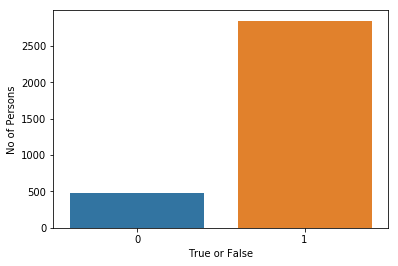

In [44]:
sns.barplot(y_counts.index,y_counts.values)
plt.xlabel('True or False')
plt.ylabel('No of Persons')
plt.show()

In [45]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

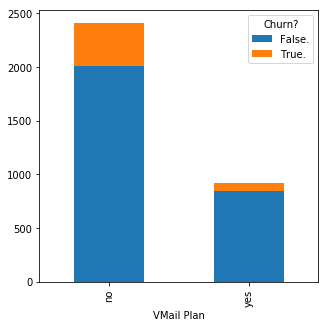

In [46]:
df.groupby(["VMail Plan", "Churn?"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) ;

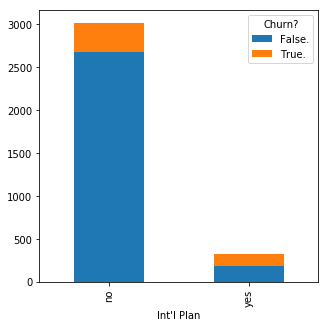

In [47]:
df.groupby(["Int'l Plan", "Churn?"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) ;

# train the model 

In [53]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [15]:
svc = SVC()

In [16]:
X_train.shape

(2499, 7)

In [17]:
X_test.shape

(834, 7)

In [18]:
y.shape

(3333,)

In [19]:
svc.fit(X_train,Y_train)

C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [20]:
svc.score(X_train,Y_train)

1.0

In [21]:
svc.score(X_test,Y_test)

0.8405275779376499

In [22]:
rf= RF()
rf.fit(X_train,Y_train)

C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
rf.score(X_train,Y_train)

0.9891956782713085

In [24]:
rf.score(X_test,Y_test)

0.8645083932853717

In [25]:
knn = KNN()
knn.fit(X_train,Y_train)

C:\Users\vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
knn.score(X_train,Y_train)

0.8967587034813925

In [27]:
knn.score(X_test,Y_test)

0.8537170263788969

In [49]:
gn = GaussianNB()

In [50]:
gn.fit(X_train,Y_train)

C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
gn.score(X_train,Y_train)

0.8831532613045218

In [52]:
gn.score(X_test,Y_test)

0.8597122302158273

In [54]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
dtc.score(X_train,Y_train)

1.0

In [56]:
dtc.score(X_test,Y_test)

0.7829736211031175

In [58]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
lr.score(X_train,Y_train)

0.8611444577831132

In [60]:
lr.score(X_test,Y_test)

0.841726618705036

In [61]:
print(f'Score of Logistic Regression is {lr.score(X_test,Y_test)}')
print(f'Score of SVC is {svc.score(X_test,Y_test)}')
print(f'Score of KNN is {knn.score(X_test,Y_test)}')
print(f'Score of  Random Forest is {rf.score(X_test,Y_test)}')
print(f'Score of Gaussian NB is {gn.score(X_test,Y_test)}')
print(f'Score of Decision tree is {dtc.score(X_test,Y_test)}')

Score of Logistic Regression is 0.841726618705036
Score of SVC is 0.8405275779376499
Score of KNN is 0.8537170263788969
Score of  Random Forest is 0.8645083932853717
Score of Gaussian NB is 0.8597122302158273
Score of Decision tree is 0.7829736211031175
